# Pronóstico de ventas de empresa mexicana utilizando cadenas de Markov.

<div style="text-align: justify">
A traves del siguiente trabajo se propone pronosticar las ventas semanales para el lo que resta del año 2020 y el 2021 a traves de cadenas de markov y su cambio de estados a traves del tiempo.
Para el pronostico de las ventas utilizaremos las ventas semanales que se han tenido desde mayo de 2013 a agosto de 2020.
En la parte final se compara el pronosticos realizado mediante el proceso de Markov con otras tecnicas estadisitcas(ARIMA), para medir las proyecciones de ventas.
El pronostico de ventas sera de gran ayuda, ya que permitira a las areas como produccion y marketing realizar un mejor plan de trabajo y tener el stock necesario para cubrir las necesidades de la empresa.
</div>


## Descripción del fenómeno

### Empresa mexicana 
<div style="text-align: justify">
La empresa mexciana en la cual utilizaremos el pronostico de ventas mensuales para el siguiente año y para el 2025 es una empresa originaria de Jalisco enfocada en la venta de embutidos en gran parte de Jalisco, en este proyecto se pronosticaran la venta mensual de un cliente de la empresa.
Los datos es el numero de Kg vendidos por semana y año desde mayo de 2013 hasta junio de 2020.
</div>


### Descripción del tiempo
<div style="text-align: justify">
El pronostico de ventas como se menciono anteriormente sera mensual para el siguiente año 2021 y pronosticos anuales para los siguientes años, actualmente se limpio la base de manera que las ventas sean de manera mensual de todos los productos, pero en caso de ser necesario puede ser detallada por semana y producto, dependiendo de las necesidades del cliente.
</div>


## Características del modelo

El modelo consta con las ventas semanales desde mayo de 2013 a junio de 2020, en el cual las ventas en cada mes estan clasificados en 2 estados los culaes son los siguientes

Cada registro de venta mensual puede encontrarse en alguno de los siguientes 2 estados en un momento $n$ dado:
 1. Ventas bajas. 
 2. Ventas promedio.
 3. Ventas altas.
 
    
Estos estados fueron obtenidos al momento de obtener el promedio de las ventas +/- unas sd para obtener las ventast medias:

En la siguiente tabla se observan los limites de cada uno de los 3 estados

| Parametro      |  Valor       | 
| :------------- | :----------: | 
|  $E_1$             | (0,17,870]          | 
|  $E_2$           | (17,871,37,157]           | 
|  $E_3$           | (37,158, ∞]           | 

Para obtener la matriz de probabilidad de transición de un estado a otro, el primer paso seria obtener el número de ocurrenccias de cada estado

Una vez obtenida la número de ocurrencias de cada estado y como cambian de un estado a otro el siguiente paso para obtener la matriz de probabilidad de transición es dividir la frecuencia de ese estado entre el total de elemento en el Estado n



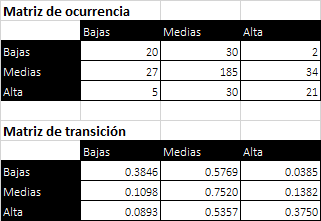

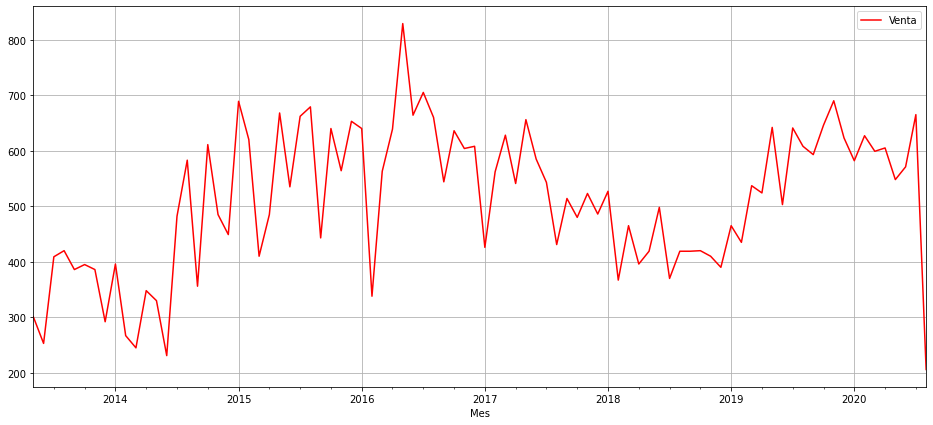

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

#Ventas

Datos = {'Mes': [ "2013-05", "2013-06", "2013-07", "2013-08", "2013-09", "2013-10", "2013-11", "2013-12", "2014-01", "2014-02", "2014-03", "2014-04", "2014-05", "2014-06", "2014-07", "2014-08", "2014-09", "2014-10", "2014-11", "2014-12", "2015-01", "2015-02", "2015-03", "2015-04", "2015-05", "2015-06", "2015-07", "2015-08", "2015-09", "2015-10", "2015-11", "2015-12", "2016-01", "2016-02", "2016-03", "2016-04", "2016-05", "2016-06", "2016-07", "2016-08", "2016-09", "2016-10", "2016-11", "2016-12", "2017-01", "2017-02", "2017-03", "2017-04", "2017-05", "2017-06", "2017-07", "2017-08", "2017-09", "2017-10", "2017-11", "2017-12", "2018-01", "2018-02", "2018-03", "2018-04", "2018-05", "2018-06", "2018-07", "2018-08", "2018-09", "2018-10", "2018-11", "2018-12", "2019-01", "2019-02", "2019-03", "2019-04", "2019-05", "2019-06", "2019-07", "2019-08", "2019-09", "2019-10", "2019-11", "2019-12", "2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08"],
         'Venta':[301,253,409,420,386,395,386,292,396,267,245,348,330,231,482,583,356,611,485,449,689,620,410,485,668,535,662,679,443,640,564,653,640,338,563,639,829,664,705,660,544,636,604,608,426,562,628,541,656,585,543,431,514,480,523,486,527,367,465,396,419,498,370,419,419,420,410,390,465,435,537,524,642,503,641,608,593,646,690,623,582,627,599,605,548,571,665,206]}

Datos = pd.DataFrame(Datos, columns = ['Mes', 'Venta'])

Datos['Mes'] = pd.to_datetime(Datos['Mes'])
Datos.set_index('Mes', inplace=True)

Datos.plot(grid=True, figsize=(16,7),color = "red")



In [62]:
#

In [3]:
import numpy as np
import random as rn

estados = ["Bajo", "Medio", "Alto"]

matrizNombres = [["BB", "BM", "BA"], ["MB", "MM", "MA"], ["AB", "AM", "AA"]]

matrizTransicion =[[0.3846, 0.5769, 0.0385], [0.1098, 0.7520, 0.1382], [0.0893, 0.5357, 0.3750]]

def prediccion (dias):
    Ventahoy = "Alto"
    print("Estado inicial " + Ventahoy)
    accionVector = [Ventahoy]
    i = 0
    prob = 1
    while i != dias:
      if Ventahoy == "Bajo":
        variacion = np.random.choice(matrizNombres[0], replace=True, p=matrizTransicion[0])
        if variacion == "BB":
          prob = prob * 0.3846
          accionVector.append("Bajo")
          pass
        elif variacion == "BM":
          prob = prob * 0.5769
          Ventahoy = "Medio"
          accionVector.append("Medio")
        else:
          prob = prob * 0.0385
          Ventahoy = "Alto"
          accionVector.append("Alto")
      elif Ventahoy ==  "Medio":
        variacion = np.random.choice(matrizNombres[1],replace=True,p=matrizTransicion[1])
        if variacion == "MM":
          prob = prob * 0.7520
          accionVector.append("Medio")
          pass
        elif variacion == "MB":
          prob = prob * 0.1098
          Ventahoy = "Bajo"
          accionVector.append("Bajo")
        else:
          prob = prob * 0.1382
          Ventahoy = "Alto"
          accionVector.append("Alto")
      elif Ventahoy ==  "Alto":
        variacion = np.random.choice(matrizNombres[2],replace=True,p=matrizTransicion[2])
        if variacion == "AA":
          prob = prob * 0.3750
          accionVector.append("Alto")
          pass
        elif variacion == "AB":
          prob = prob * 0.0893
          Ventahoy = "Bajo"
          accionVector.append("Bajo")
        else :
          prob = prob * 0.5357
          Ventahoy = "Media"
          accionVector.append("Media")

      i += 1

    print("Ultimo estado despues de " + str(dias) + " dias " + Ventahoy)
    print("Probabilidad de la secuencia de estados " + str(prob))
    print("Posibles estados: " + str(accionVector))

prediccion(2)

Estado inicial Alto
Ultimo estado despues de 2 dias Alto
Probabilidad de la secuencia de estados 0.140625
Posibles estados: ['Alto', 'Alto', 'Alto']
